# Import dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
# files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
! kaggle datasets list
! pip install --upgrade --force-reinstall --no-deps kaggle
! kaggle competitions download -c how-am-i-feeling-tb2109 -p 'dataset' 

In [ ]:
cd dataset

[Errno 2] No such file or directory: 'dataset'
/content/dataset


In [ ]:
! mkdir train
! unzip how-am-i-feeling-tb2109.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  how-am-i-feeling-tb2109.zip
replace train/data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Check images with labels

In [ ]:
import pandas as pd
train = pd.read_csv('train/data/train_set.csv')
train

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


happy


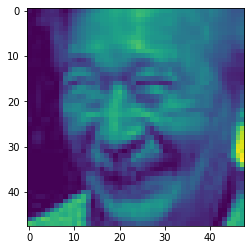

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

img_idx = random.randint(0,len(train))

img = mpimg.imread(os.path.join(r'/content/dataset/train/data/train/',train.iloc[img_idx,2]))
imgplot = plt.imshow(img)
label = train.iloc[img_idx,0]

print(label)

# Transfer images into an array

Creating train dataset

In [ ]:
import cv2 
import numpy as np

train_images = []
for i in range(len(train['id_img'])):
    temp_imag = cv2.imread("train/data/train/" + train.path[i], 0)
    train_images.append(temp_imag)
train_images = np.array(train_images)   

In [ ]:
train_images

array([[[ 25,  44,  56, ...,  34,  11,  17],
        [ 30,  46,  54, ...,  45,  19,  17],
        [ 38,  50,  55, ...,  53,  25,  12],
        ...,
        [110, 116, 129, ...,  40,  63,  34],
        [110, 138, 135, ...,  51,  52,  30],
        [ 93, 142, 127, ...,  73,  48,  33]],

       [[ 33,  29,  22, ...,  22,  19,  26],
        [ 36,  29,  20, ...,  29,  23,  24],
        [ 33,  25,  15, ...,  30,  25,  21],
        ...,
        [ 28,  28,  29, ...,   8,   0,   9],
        [ 24,  23,  23, ...,  11,   0,  10],
        [ 22,  20,  18, ...,  17,   0,  16]],

       [[ 35,  43,  66, ...,  61,  63,  54],
        [ 32,  40,  58, ...,  59,  63,  57],
        [ 30,  39,  48, ...,  62,  61,  57],
        ...,
        [167, 158, 153, ...,  72,  71,  70],
        [185, 167, 152, ...,  73,  71,  71],
        [203, 179, 154, ...,  73,  72,  71]],

       ...,

       [[109,  25,  29, ..., 148, 148, 149],
        [115,  39,  19, ..., 151, 152, 150],
        [123,  47,  17, ..., 158, 159, 154

Adding labels after encoding

In [ ]:
train_labels = np.array(train['label'])
train_labels

array(['happy', 'happy', 'happy', ..., 'sadness', 'sadness', 'sadness'],
      dtype=object)

In [ ]:
for i in range(len(train_labels)):
    if train_labels[i] == 'happy':
        train_labels[i] = 1
    else:
        train_labels[i] = 0   

In [ ]:
train_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(train_images,
                                                      train_labels,test_size=0.2, random_state= 42)

In [ ]:
print(len(train_images))
print(len(test_images))
print(len(train_labels))
print(len(test_images))

4940
1236
4940
1236


# Standarization

Since there are 255 scales of grey and out pictures are in scale of grey, by dividing each by 255 we will standarize it and the values will fit into range from 0 to 1

In [ ]:
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255
train_labels = train_labels.astype("float32")
test_labels = test_labels.astype("float32")

In [ ]:
len(train_images[0][0])

48

In [ ]:
test_images[0][0]

array([0.07843138, 0.01960784, 0.01568628, 0.04705882, 0.03921569,
       0.03529412, 0.04705882, 0.03529412, 0.03529412, 0.00784314,
       0.09803922, 0.03921569, 0.07450981, 0.3137255 , 0.39607844,
       0.39215687, 0.4117647 , 0.35686275, 0.34509805, 0.39607844,
       0.43137255, 0.40784314, 0.38039216, 0.3764706 , 0.41568628,
       0.6156863 , 0.50980395, 0.36078432, 0.47843137, 0.5019608 ,
       0.43137255, 0.5019608 , 0.19215687, 0.08235294, 0.14509805,
       0.11372549, 0.10196079, 0.18039216, 0.1254902 , 0.08627451,
       0.05490196, 0.02352941, 0.1882353 , 0.49411765, 0.4509804 ,
       0.27058825, 0.3137255 , 0.29803923], dtype=float32)

In [ ]:
train_labels[:10]

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels[:10]

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.], dtype=float32)

# Flattening matrixes in train_images

Flatten function

In [ ]:
import numpy as np
  
train_images_flatten = []
test_images_flatten = []

for i in range(len(train_images)):
  train_images_flatten.append(train_images[i].flatten())

for i in range(len(test_images)):
  test_images_flatten.append(test_images[i].flatten())

Let's check matrices' elements equal before and after flatten function

In [ ]:
rows_num = len(train_images[0])
cols_num = len(train_images[0][0])
cols_num * rows_num

2304

In [ ]:
len(train_images_flatten[0])

2304

Now let's check accordance of image count in before flatten list and after flatten list

In [ ]:
len(train_images)

4940

In [ ]:
len(train_images_flatten)

4940

In [ ]:
len(test_images)

1236

In [ ]:
len(test_images_flatten)

1236

# Random Forest Classifier

## Ensemble learning

There are two ensemble learning methods

1. average method
* We define estimators for several models, whether it be the same model rerunned with different hyperparameters several times or totaly different models. Then we count average of all outputted estiamtors. This average will be better than each one of single estimator because the variance of an average is far more reduced that in any of calculated estimators.

* good example of average method is random forest, which generates output of several decision trees and then count average of each decision tree. This average is final solution. That's why it's called random forrest.

2. boosting method
* First we produce first estimator H1 which is the best fit according to the accuracy. Then we find errors in predicting the class. After that we weights to those errors creating H2 estimator. We are aggregating those samples that has H1 prediction different thatn H2 and by this we create H3 estimator.

* Example is Ada boost

In this project we will use Random Forrest classifier

## Best Parameters

define hyperparameters to tune

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

parameters = {
    "n_estimators":[5,10,20,100],
    "max_depth":[8,16,20,32,None],
    'criterion':['entropy', 'gini']
}

launch grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_images_flatten,train_labels.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 16, 20, 32, None],
                         'n_estimators': [5, 10, 20, 100]})

In [ ]:
print(f'Best parameters are: {cv.best_params_}\nBest score is: {round(cv.best_score_,4)*100}%')

Best parameters are: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
Best score is: 70.83%


## Training

In [ ]:
# RFC instances
rfc_gini = RandomForestClassifier(max_depth=None, random_state=0, n_estimators=100, criterion = 'gini')
rfc_entropy = RandomForestClassifier(max_depth=None, random_state=0, n_estimators=100, criterion = 'entropy')

# training
rfc_gini.fit(train_images_flatten, train_labels)
rfc_entropy.fit(train_images_flatten, train_labels)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predict

In [ ]:
predictions_gini = rfc_gini.predict(test_images_flatten)
predictions_entropy = rfc_entropy.predict(test_images_flatten)

## Testing

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error as mae

print('rfc accuracy by gini: {}%'.format(round(acc(test_labels, predictions_gini),4)*100))
print('rfc mean absolute error by gini: {}%'.format(round(mae(test_labels, predictions_gini),4)*100))
print('\n')
print('rfc accuracy by entropy: {}%'.format(round(acc(test_labels, predictions_entropy),4)*100))
print('rfc mean absolute error by entropy: {}%'.format(round(mae(test_labels, predictions_entropy),4)*100))

accuracy by gini: 72.65%
mean absolute error by gini: 27.3499995470047%


accuracy by entropy: 73.54%
mean absolute error by entropy: 26.460000872612%


As we can see Entropy is better than gini in out example, thus we will use that one.

## ROC curve

In [ ]:
y_pred_proba = rfc_entropy.predict_proba(test_images_flatten)[:,1]
y_pred_proba

array([0.58, 0.75, 0.31, ..., 0.59, 0.55, 0.45])

In [ ]:
# pip install plot_metric

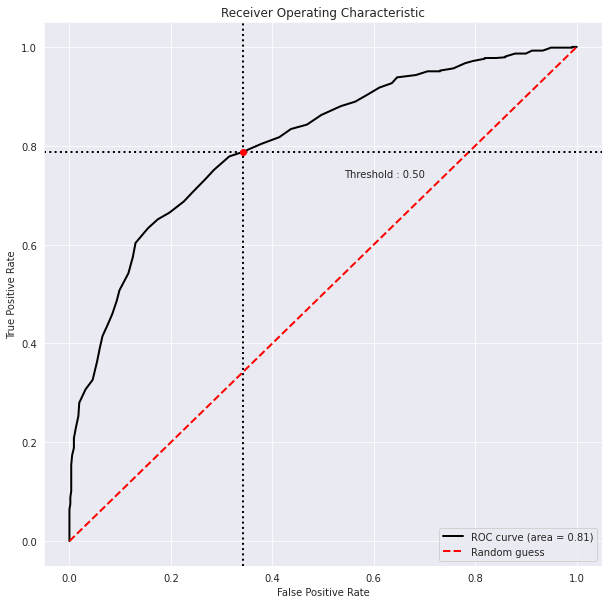

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(test_labels, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

# Decission Tree

## Best Parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters2 = {
    "max_depth":[8,16,20,32,None],
    'criterion':['entropy', 'gini']
}

cv = GridSearchCV(dtc,parameters2,cv=5)
cv.fit(train_images_flatten,train_labels.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 16, 20, 32, None]})

In [ ]:
print(f'Best parameters are: {cv.best_params_}\nBest score is: {round(cv.best_score_,2)*100}%')

Best parameters are: {'criterion': 'gini', 'max_depth': 8}
Best score is: 62.0%


As we can see decission tree classifier is about 10% worst in accuracy than random forest. However let's check it by ourselves.

## Training

In [ ]:
# DTC instances
dtc_gini = DecisionTreeClassifier(max_depth=8, random_state=0, criterion = 'gini')
dtc_entropy = RandomForestClassifier(max_depth=8, random_state=0, criterion = 'entropy')

# training
dtc_gini.fit(train_images_flatten, train_labels)
dtc_entropy.fit(train_images_flatten, train_labels)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=0)

## Predict

In [ ]:
dtc_predictions_gini = dtc_gini.predict(test_images_flatten)
dtc_predictions_entropy = dtc_entropy.predict(test_images_flatten)

## Testing

In [ ]:
print('dtc accuracy by gini: {}%'.format(round(acc(test_labels, dtc_predictions_gini),4)*100))
print('dtc mean absolute error by gini: {}%'.format(round(mae(test_labels, dtc_predictions_gini),4)*100))
print('\n')
print('dtc accuracy by entropy: {}%'.format(round(acc(test_labels, dtc_predictions_entropy),4)*100))
print('dtc mean absolute error by entropy: {}%'.format(round(mae(test_labels, dtc_predictions_entropy),4)*100))

dtc accuracy by gini: 62.46000000000001%
dtc mean absolute error by gini: 37.540000677108765%


dtc accuracy by entropy: 70.87%
dtc mean absolute error by entropy: 29.12999987602234%


GridSearch didn't perform well as we can see oposite what GridSearch deducted entripy performed better than gini. And we are about only 3% worst than Random Forest Classifier with entropy criterion.

However, as we now know that the RFC is better let's proceed with this one

# Sequential model (deep learning)

## Reshape

In [ ]:
train_images_flatten_dl = np.array(train_images_flatten)
test_images_flatten_dl = np.array(test_images_flatten)
train_labels_dl = np.array(train_labels)
test_labels_dl = np.array(test_labels)

In [ ]:
print(train_images_flatten_dl.shape)
print(train_labels_dl.shape)
print(test_images_flatten_dl.shape)
print(test_labels_dl.shape)

(4940, 2304)
(4940,)
(1236, 2304)
(1236,)


In [ ]:
train_labels_dl = train_labels_dl.reshape(-1,1)
test_labels_dl = test_labels_dl.reshape(-1,1)

In [ ]:
train_images_flatten_dl = np.stack(train_images_flatten_dl)
test_images_flatten_dl = np.stack(test_images_flatten_dl)
train_images_flatten_dl = train_images_flatten_dl.reshape(4940, 48, 48, 1)
test_images_flatten_dl = test_images_flatten_dl.reshape(1236, 48, 48, 1)

In [ ]:
print(train_images_flatten_dl.shape)
print(train_labels_dl.shape)
print(test_images_flatten_dl.shape)
print(test_labels_dl.shape)

(4940, 48, 48, 1)
(4940, 1)
(1236, 48, 48, 1)
(1236, 1)


## Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=16,kernel_size=5,strides=2,padding="same",input_shape=(48, 48,1), activation="relu"))
model.add(keras.layers.Dropout(.2)) #to avoid overfitting
model.add(keras.layers.BatchNormalization()) # to speed up learing
model.add(keras.layers.Conv2D(filters=32,kernel_size=5,strides=2,padding="same", activation="relu"))
model.add(keras.layers.Dropout(.2)) #to avoid overfitting
model.add(keras.layers.BatchNormalization())# to speed up learing
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=2,padding="same", activation="relu"))
model.add(keras.layers.Flatten(input_shape=(48, 48)))
# Hidden layer
model.add(keras.layers.Dense(units = 256,
                            activation='relu'))

model.add(keras.layers.Dropout(.3)) #to avoid overfitting
model.add(keras.layers.BatchNormalization())# to speed up learing
model.add(keras.layers.Dense(units = 128,
                            activation='relu'))

model.add(keras.layers.Dropout(.3)) #to avoid overfitting
model.add(keras.layers.Dense(units = 2,
                            activation='sigmoid'))

model.summary()

model.compile(
    optimizer = 'SGD',
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

earlystop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1,
    mode='auto', restore_best_weights=True
)

history = model.fit(
    train_images_flatten_dl,
    train_labels_dl,
    batch_size = 32,
    epochs = 100,
    validation_data = (test_images_flatten_dl, test_labels_dl),
    callbacks=[earlystop] #to predvent overfitting
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_44 (Conv2D)          (None, 12, 12, 32)        12832     
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                     

Model stopped due to overfitting 

sparse_categorical_accuracy: 0.7711 - val_loss: 0.5298 - val_sparse_categorical_accuracy: 0.7314

## Model loss plot

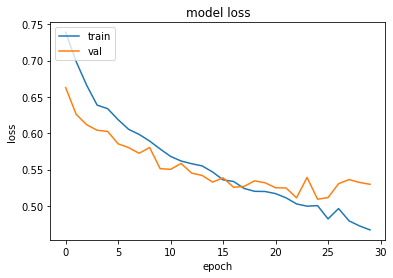

In [ ]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images_flatten_dl, test_labels_dl)
print("final accuracy : ",test_acc)

39/39 [==============================] - 1s 14ms/step - loss: 0.5093 - sparse_categorical_accuracy: 0.7605
final accuracy :  0.7605177760124207


# Entropy



surprise = log( 1 / p(x) )

surprise to poprostu "wskaźnik zaskoczenia". Jeżeli mamy w pudełku 9 czerwonych piłek i 1 żółtą prawdopodobieństwo wylosowania czerwonej kuli to 0.9, zaś żółtej 0.1. Kiedy jednak mówimy o surprise moglibyśmy wziąć odwrotność prawdopodobieństwa. Wówczas surprise wylosowania czerwonej kuli byłby równy 10/9 zaś żółtej kuli aż 10. Wylosowanie żółtej kuli znacznie bardziej by nas zaskoczyło niż wylosowanie czerwonej kuli. Zatem powodem, dla którego surprise = log(1/p(x)) a nie 1/p(x) jest to, że gdybyśmy mieli 10 kul czerwonych i 0 żółtych, surprise wylosowania kuli czerwonej wynosiłby 1/1 czyli 1, czyli tyle samo ile wynosi prawdopodobieństwo. Stąd stosowany jest logarytm.

Entropia jest to nic innego niż wartość oczekiwana z wskaźnika surprise. 

E(surprise) = Entropia

* cz - 9
* p(cz) = 0.9
* surprise(cz) = 0.15

* ż - 1
* p(ż) = 0.1
* surprise(ż) = log2(0.1) = 3.32

Zatem wartość oczekiwana surprise dla całego zdarzenia losowania to

0.9x0.15+0.1x3.32 = 0.47

Innymi słowy oznacza to, że przy każdym losowaniu (ze zwracaniem) oczekujemy surprise równego 0.47.

Zatem podsumowując entropia to

E(surprise) = p(cz) * log2( 1 / p(cz) ) + p(ż) * log2( 1 / p(ż) )

jeżeli chcemy uogólnić wzór do użycia dla każdej ilości możliwych zdarzeń wstawiając sigma, oraz używając właściwości logarytmów log(1/p) = log(1) - log(p) = 0 - log(p), wreszcie wymnażając i wyciągając minus przed sigmę otrzymamy poniższy wzór zapresentowany przez Caluda Shannona:

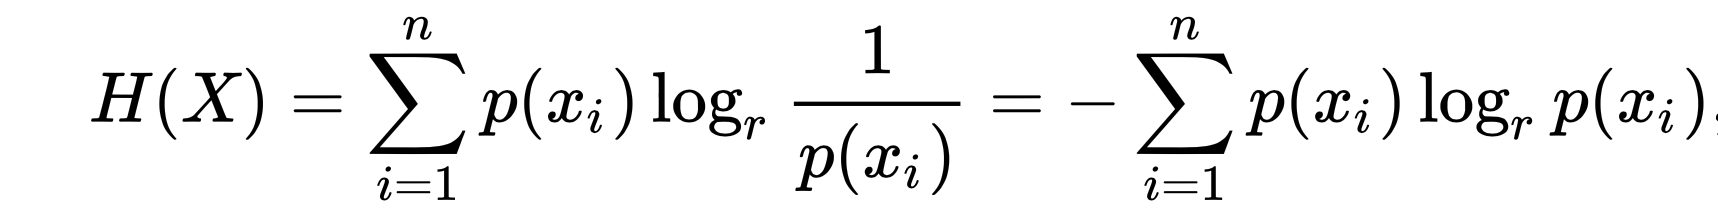

Zatem jak to się ma do przyrostu informacji? Otóż w drzewach decyzyjnych zachodzi problem jak, kiedy oraz jakim "pytaniem" podzielić daną gałąź drzewa na dwie kolejne. Drzewa decyzyjne stosują prostą zasadę, mówiącą o dzieleniu drzewa w taki sposób aby entropia była jak NAJNIŻSZA lub też miała jak najwyższy przyrost informacji. Przyrost informacji i entropia to przeciwieństwa. Zatem, jeżeli mamy 9 kul czerwonych i 1 żółtą entropia jest mała, a przyrost informacji duży. Inaczej mówiąc podnosząc kule z tego koszyka możemy być prawie pewni, że nasza kula jest czerwona. Jednak kiedy kul czerwonych jest 5 i kul żółtych jest 5, możemy powiedzieć, że posiadamy brak jakichkolwiek wskazówek czy wybrana kula jest czerwona czy żółta. Entropia w tym przypadku jest równa 1 a przyrost informacji jest niski. 

Drzewa decyzyjne dązą do tego aby dzielić dane za pomocą pytań (gałęzi) na grupy, które mają jak największy przyrost informacji, tudzież jak najmnieszą entropie. Wszystko po to abyśmy po podzieleniu danych na dwie grupy mieli jak największą pewność co do klasy jednej i drugiej podgrupy. Drzewo decyzyjne działa iteracyjnie na kolejnych to podgrupach dzieląc je cały czas tak aby uzyskać najwyższy możliwy przyrost informacji.

# Testing App

In [ ]:
cd /content/

/content


In [ ]:
def app():
  import cv2 
  img_test = files.upload()
  img_test_name = list(img_test.keys())[0]
  img_test_path = mpimg.imread(os.path.join(r'/content/',img_test_name))
  imgplot = plt.imshow(img_test_path)

  # get matrices in grey scale
  img_test_vectors = cv2.imread("/content/" + img_test_name, 0)
  # standarization
  img_test_vectors = img_test_vectors/255
  # flattening
  flatten_img = img_test_vectors.flatten().reshape(1, -1)

  label = rfc_entropy.predict(flatten_img)
  return print('\n\n     This person is', 'SAD' if label[0]<0.5 else 'HAPPY')

Saving 00006.jpg to 00006 (6).jpg


     This person is SAD


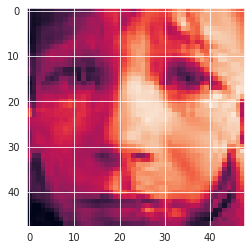

In [ ]:
test1 = app()
test1

Saving 03495.jpg to 03495 (3).jpg


     This person is SAD


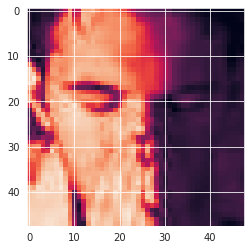

In [ ]:
test2 = app()
test2

Saving 00124.jpg to 00124.jpg


     This person is HAPPY


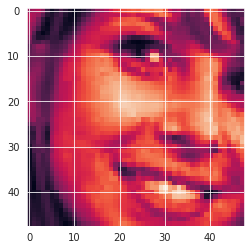

In [ ]:
test3 = app()
test3

Saving 00067.jpg to 00067 (2).jpg


     This person is HAPPY


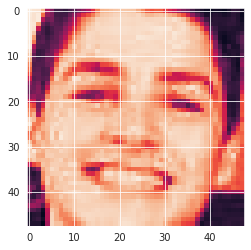

In [ ]:
test4 = app()
test4

Saving 00016.jpg to 00016 (1).jpg


     This person is SAD


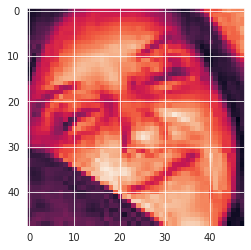

In [ ]:
test5 = app()
test5

This prediction is wrong as we can see this woman is rather happy than sad, however it's not so obvious emotion. Thus, the model didn't detect it correct.

To launch the app

1. call instance
* test = app()

2. run 
* test

3. input some emotion photo

# Kaggle submission

## Random Forest Classifier

In [ ]:
test_set = pd.read_csv('/content/dataset/train/data/test_set.csv')
test_set

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg
...,...,...
4112,8966,test/08966.jpg
4113,12111,test/12111.jpg
4114,16629,test/16629.jpg
4115,24322,test/24322.jpg


In [ ]:
import cv2

images = []

for i in test_set.iterrows():
  img_name = i[1][1]
  # img_test_path = mpimg.imread(os.path.join(r'/content/dataset/train/data/',img_name))
  temp_imag = cv2.imread('/content/dataset/train/data/' + img_name, 0)
  images.append(temp_imag)

flat_images = []

for i in images:
  # standarization
  i = i/255
  # flattening
  i = i.flatten()
  flat_images.append(i)

predictions = rfc_entropy.predict(flat_images)

array([1., 1., 1., ..., 0., 1., 1.], dtype=float32)

In [ ]:
ss = pd.read_csv('/content/dataset/train/data/sample_submission.csv')
ss

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,sadness
4113,12111,sadness
4114,16629,sadness
4115,24322,sadness


In [ ]:
ss['label'] = predictions
ss

,id_img,label
0,18341,1.0
1,13176,1.0
2,23945,1.0
3,15968,1.0
4,18382,1.0
...,...,...
4112,8966,1.0
4113,12111,0.0
4114,16629,0.0
4115,24322,1.0


In [ ]:
ss['label'] = ss['label'].apply(lambda x: 'happy' if x > 0.5 else 'sadness')
ss

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,sadness
4114,16629,sadness
4115,24322,happy


In [ ]:
ss.to_csv('sumbission.csv',index = False)

https://www.kaggle.com/c/how-am-i-feeling-tb2109/leaderboard#score

## Sequential model

In [ ]:
test_set2 = pd.read_csv('/content/dataset/train/data/test_set.csv')
test_set2

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg
...,...,...
4112,8966,test/08966.jpg
4113,12111,test/12111.jpg
4114,16629,test/16629.jpg
4115,24322,test/24322.jpg


In [ ]:
import cv2

images = []

for i in test_set2.iterrows():
  img_name = i[1][1]
  # img_test_path = mpimg.imread(os.path.join(r'/content/dataset/train/data/',img_name))
  temp_imag = cv2.imread('/content/dataset/train/data/' + img_name, 0)
  images.append(temp_imag)

flat_images = []

for i in images:
  # standarization
  i = i/255
  # flattening
  i = i.flatten()
  flat_images.append(i)

flat_images = np.array(flat_images)
flat_images = flat_images.reshape(4117, 48, 48, 1)
flat_images.shape

(4117, 48, 48, 1)

In [ ]:
predictions_model = model.predict(flat_images).round(3)
predictions_final = []
for i in predictions:
  predictions_final.append(np.argmax(i))
predictions_final[:10]

[1, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [ ]:
test_set2['label'] = predictions_final
test_set2['label'] = test_set2['label'].apply(lambda x: 'happy' if x > 0.5 else 'sadness')
test_set2 = test_set2[['id_img', 'label']]
test_set2

,id_img,label
0,18341,happy
1,13176,happy
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,sadness
4114,16629,sadness
4115,24322,happy


In [ ]:
test_set2.to_csv('submission2', index = False)

Kaggle score#
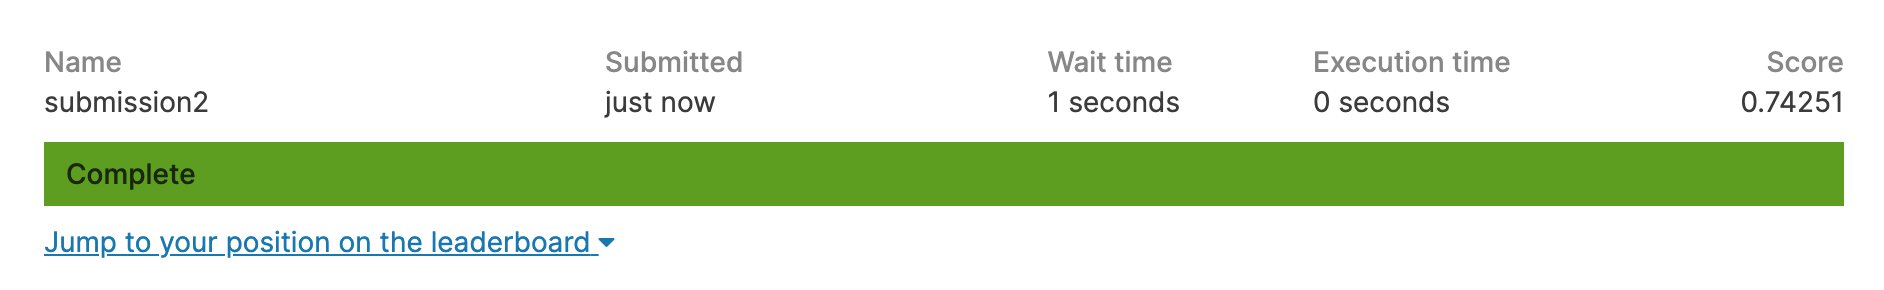